In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append(os.path.abspath("../"))  # Ensure src is in sys.path

from utils.VisualisationUtils import *

In [ ]:
sensitive_classes = pd.read_csv(f'{local_dataset_metadata}/sensitive-segmentation-classes.txt', header=None)
sensitive_classes.columns = ['description']
sensitive_classes['class'] = sensitive_classes['description'].apply(lambda x: box_classes[box_classes.description == x].index[0])
sensitive_classes = sensitive_classes.set_index('class')

In [2]:
local_dataset_metadata = r'C:\Users\Sai\Documents\Neu\Masters Project\PerceptionPrivacy\datasets\Open_Images'
open_images_dir = r'C:\Users\Sai\fiftyone\open-images-v7\validation'
samples_dir = os.path.join(open_images_dir, 'data')
labels_dir = os.path.join(open_images_dir, 'labels')
masks_dir = os.path.join(labels_dir, 'masks') 

segmentation_classes = pd.read_csv(f'{local_dataset_metadata}/oidv7-classes-segmentation.csv', index_col='class')
sensitive_classes = pd.read_csv(f'{local_dataset_metadata}/sensitive-segmentation-classes.csv', index_col='class')
box_classes = pd.read_csv(f'{local_dataset_metadata}/class-descriptions-boxable.csv', header=None)
box_classes.columns = ['class', 'description']
box_classes = box_classes.set_index('class')

labels_data = pd.read_csv(os.path.join(labels_dir, 'segmentations.csv'))

In [21]:
labels_data.head()

,MaskPath,ImageID,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks,Description,Suffix
0,114d6b81e7b1fa08_m01bl7v_b62eb236.png,114d6b81e7b1fa08,/m/01bl7v,b62eb236,0.036101,0.332130,0.099278,0.888087,0.0,NaN,Boy,1
1,c1e3f295b0caf725_m02hj4_8f3400b7.png,c1e3f295b0caf725,/m/02hj4,8f3400b7,0.533333,0.743478,0.344595,0.506757,0.0,NaN,Dolphin,c
2,364bc47890f68a2c_m01xq0k1_5c02850a.png,364bc47890f68a2c,/m/01xq0k1,5c02850a,0.820312,0.951563,0.412500,0.702083,0.0,NaN,Cattle,3
3,a9dc47961e3ffc92_m01g317_b1fa4859.png,a9dc47961e3ffc92,/m/01g317,b1fa4859,0.000000,0.818750,0.000000,1.000000,0.0,NaN,Person,a
4,6049dabe7006460a_m03bt1vf_df8e1d85.png,6049dabe7006460a,/m/03bt1vf,df8e1d85,0.203991,0.946785,0.025037,1.000000,0.0,NaN,Woman,6


Sample 0 - 114d6b81e7b1fa08.jpg - Boy


<Figure size 1000x1000 with 0 Axes>

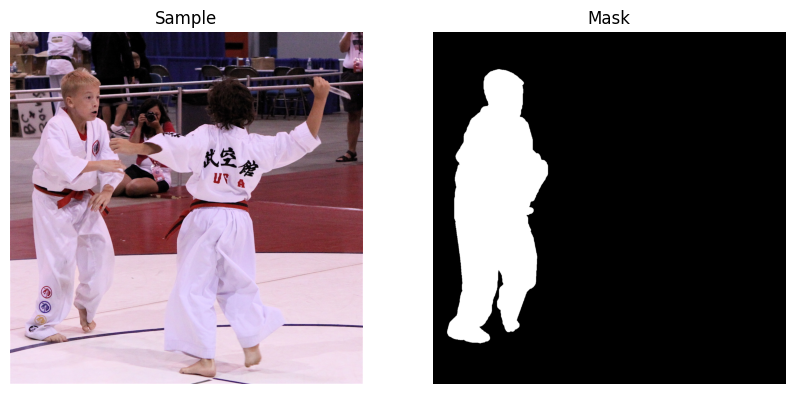

In [5]:
idx = 0
imageID = labels_data.iloc[idx].ImageID
sample_file = imageID + '.jpg'
sample = Image.open(os.path.join(samples_dir, sample_file))
segmentation_class = segmentation_classes.loc[labels_data.iloc[idx].LabelName].description
print(f'Sample {idx} - {sample_file} - {segmentation_class}')
suffix = imageID[0]
mask_file = labels_data.iloc[idx].MaskPath
mask_dir = os.path.join(masks_dir, suffix)
mask = Image.open(os.path.join(mask_dir, mask_file))
show_images([sample, mask], ['Sample', 'Mask'], figsize=(10, 10))

In [25]:
print(f'Total sensitive classes: {len(sensitive_classes)}')

Total sensitive classes: 15


In [74]:
# Display all the sensitive classes images and masks
# sensitive_class_images = labels_data[labels_data.LabelName.isin(sensitive_classes.index)]
sensitive_class_images = labels_data[labels_data.LabelName == sensitive_classes.index[14]]
sensitive_class_images = sensitive_class_images.reset_index(drop=True)
sensitive_class_images.head()

,MaskPath,ImageID,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks,Description,Suffix
0,fa50309ada7120e0_m0qjjc_c2f81c36.png,fa50309ada7120e0,/m/0qjjc,c2f81c36,0.043103,0.948276,0.008750,0.996250,0.0,NaN,Remote control,f
1,c48ad3322299db3e_m0qjjc_21be6c46.png,c48ad3322299db3e,/m/0qjjc,21be6c46,0.045455,0.464809,0.000000,0.917778,0.0,NaN,Remote control,c
2,6347108949f5cbe2_m0qjjc_089d5dc1.png,6347108949f5cbe2,/m/0qjjc,089d5dc1,0.006250,0.954687,0.422594,0.983264,0.0,NaN,Remote control,6
3,8357a23d186680d7_m0qjjc_30de53cc.png,8357a23d186680d7,/m/0qjjc,30de53cc,0.507273,0.641818,0.155556,0.764444,0.0,NaN,Remote control,8
4,8357a23d186680d7_m0qjjc_d25c2673.png,8357a23d186680d7,/m/0qjjc,d25c2673,0.314545,0.478182,0.124444,0.793333,0.0,NaN,Remote control,8


In [61]:
sensitive_classes.iloc[9]

description    Bomb
Name: /m/0ct4f, dtype: object

In [ ]:
'''
Classes to remove:
Computer keyboard
Suitcase
Clock
Food processor
Digital clock
Bomb
Camera
Envelope
Taxi
Remote control
'''

In [75]:
print(f'Total sensitive class images: {len(sensitive_class_images)}')

Total sensitive class images: 8


Sample 0 - fa50309ada7120e0.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

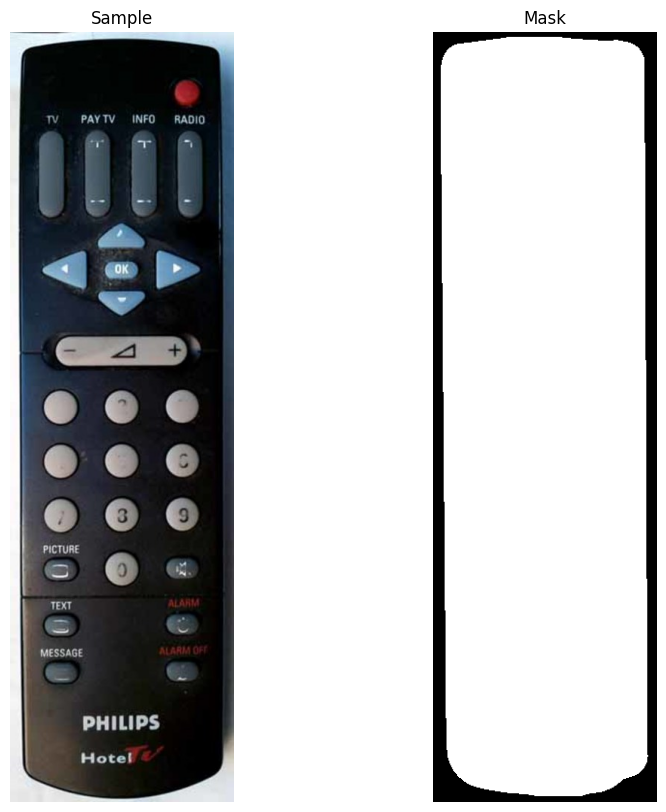

Sample 1 - c48ad3322299db3e.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

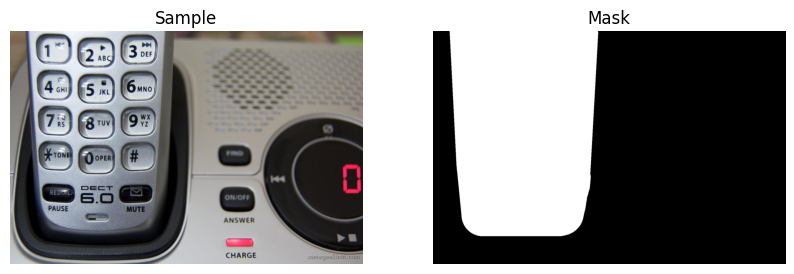

Sample 2 - 6347108949f5cbe2.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

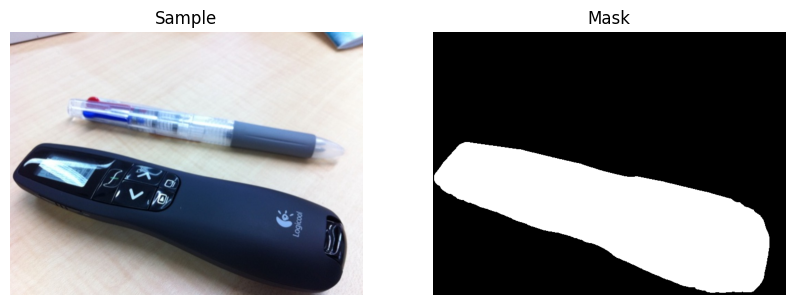

Sample 3 - 8357a23d186680d7.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

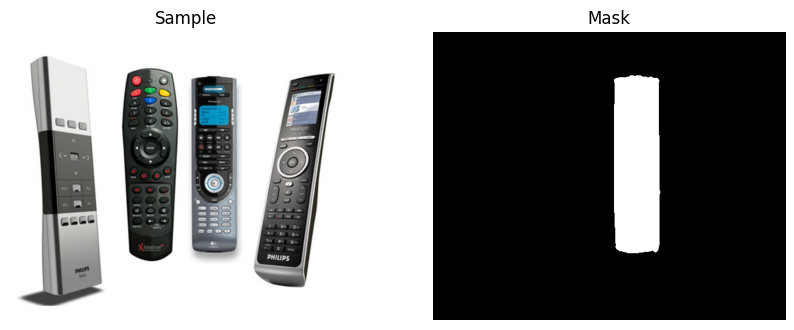

Sample 4 - 8357a23d186680d7.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

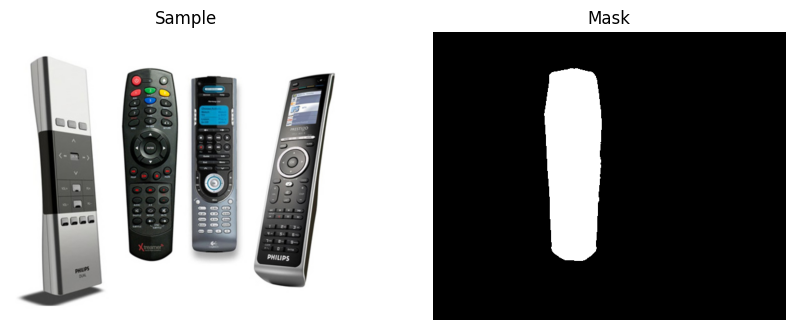

Sample 5 - 8357a23d186680d7.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

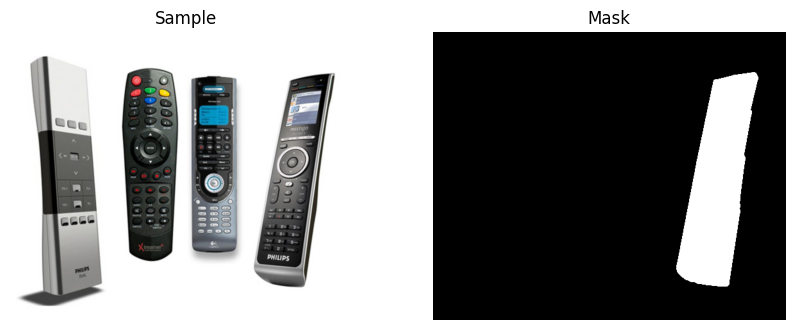

Sample 6 - 3fcd4d7ee5c3b03d.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

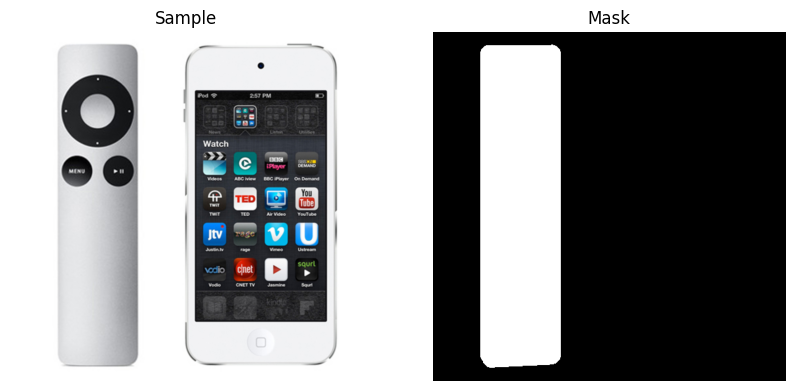

Sample 7 - 4fe2fb3816b91c44.jpg - Remote control


<Figure size 1000x1000 with 0 Axes>

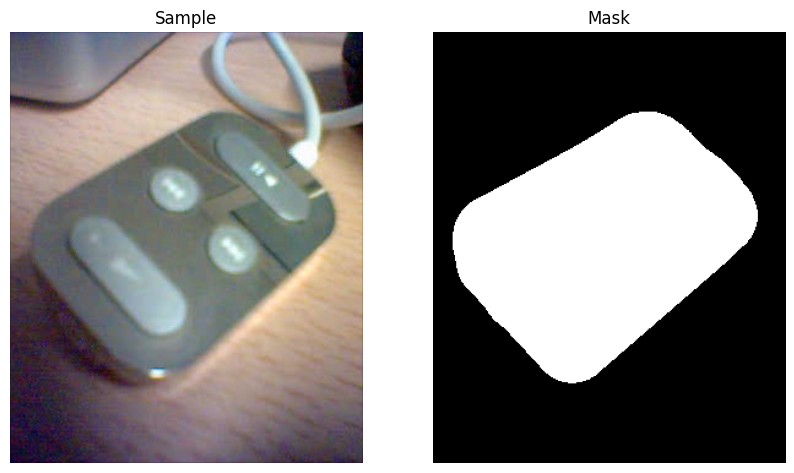

In [76]:
# Show all the sensitive classes images and masks
for idx in range(0, len(sensitive_class_images)):
    sample_file = sensitive_class_images.iloc[idx].ImageID + '.jpg'
    sample = Image.open(os.path.join(samples_dir, sample_file))
    segmentation_class = sensitive_class_images.iloc[idx].Description
    print(f'Sample {idx} - {sample_file} - {segmentation_class}')
    suffix = sensitive_class_images.iloc[idx].Suffix
    mask_file = sensitive_class_images.iloc[idx].MaskPath
    mask = Image.open(os.path.join(masks_dir, suffix, mask_file))
    show_images([sample, mask], ['Sample', 'Mask'], figsize=(10, 10))